<a id='begin'></a>
# <p style="background-color:white; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;"> Coronavirus Visualization and Analysis 📊 </p>

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ1dgHLgZ4BY-Ybql-Z9BfOLDD0VMGMRwugyA&usqp=CAU)

In [ ]:
#Necessary Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots



import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



<a id='loaddata'></a>
# <p style="background-color:white; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">Loading data 📂 </p>

In [ ]:
#Loading Dataset

dfd = pd.read_csv(r"/kaggle/input/covid19-global-dataset/worldometer_coronavirus_daily_data.csv")
dfd.head(10)

In [ ]:
#Loading Dataset

dfs = pd.read_csv(r"/kaggle/input/covid19-global-dataset/worldometer_coronavirus_summary_data.csv")
dfs.head(10)

In [ ]:
print(dfd.shape)
print(dfs.shape)

In [ ]:
#Creating a column named mortality rate

dfs["mortality_rate"] = dfs["total_deaths"]/dfs["population"]*100
dfs

**Mortality Rate**

Mortality rate, or death rate, is a measure of the number of deaths (in general, or due to a specific cause) in a particular population, scaled to the size of that population, per unit of time.

In [ ]:
#Creating a column named fatality rate

dfs["fatality_rate"] = dfs["total_deaths"]/dfs["total_confirmed"]*100
dfs

**Fatality Rate**

In epidemiology, a case fatality risk or case-fatality ratio – is the proportion of deaths from a certain disease compared to the total number of people diagnosed with the disease for a particular period. A CFR is conventionally expressed as a percentage and represents a measure of disease severity.

<p style="background-color:white; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">1.Mortality Rate by Countries </p>

In [ ]:
fig = px.bar(dfs, x="country", y="mortality_rate", title="Mortality Rate by Countries",color ="continent")
fig.update_layout( xaxis={'categoryorder':'total descending'})
fig.show()


<p style="background-color:white; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">2.Fatality Rate by Countries </p>

In [ ]:
fig = px.bar(dfs, x="country", y="fatality_rate", title="Fatality Rate by Countries",color="continent")
fig.update_layout( xaxis={'categoryorder':'total descending'})
fig.show()

# <p style="background-color:white; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">3.Wolrdwide Coronavirus Cases 🗺️ </p>

In [ ]:
def choropleth(Stats,ColorbarTitle,GraphTitle):
    
    
    
    
    
    fig = go.Figure(data=go.Choropleth(
        locations = dfs['country'],
        locationmode='country names',
        z = Stats,
        text = dfs['country'],
        colorscale = 'reds',
        autocolorscale=False,
        reversescale=False,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_title = ColorbarTitle,
        ))

    fig.update_layout(
        title_text= GraphTitle,
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type='equirectangular'
        ),
   
    )

    fig.show()

In [ ]:
choropleth(dfs["total_confirmed"],"Confirmed Cases","Coronavirus Confirmed Cases by Countries")

In [ ]:
choropleth(dfs["total_deaths"],"Deaths","Coronavirus Total Deaths by Countries")

In [ ]:
choropleth(dfs["total_recovered"],"Recovered Cases","Coronavirus Recovered Cases")

In [ ]:
choropleth(dfs["active_cases"],"Active Cases","Coronavirus Active Cases")

# <p style="background-color:white; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">4.Coronavirus Cases by Continents 🌏 🌎 🌍 </p>

In [ ]:
cts = dfs.groupby("continent",as_index=False)[["total_confirmed","total_deaths","total_recovered","active_cases","serious_or_critical"]].sum()
cts.head(6)


In [ ]:
africa = cts[cts["continent"]=="Africa"]
asia = cts[cts["continent"]=="Asia"]
ao = cts[cts["continent"]=="Australia/Oceania"]
eu = cts[cts["continent"]=="Europe"]
na = cts[cts["continent"]=="North America"]
sa = cts[cts["continent"]=="South America"]

In [ ]:
def pie_chart(continent,text):
    trace = go.Pie(labels=['Total Confirmed','Total Deaths','Total Recovered', 'Total Active','Critical Cases'],
               values=[continent.total_confirmed.sum(),continent.total_deaths.sum(),continent.total_recovered.sum(), continent.active_cases.sum(),continent.serious_or_critical.sum()], 
               title_font_size=20,
               hovertemplate="<b>%{label}</b><br>%{value}<br><i>%{percent}</i>",
               textinfo='percent',
               textposition='inside',
               showlegend=True,
               name='',
               marker=dict(colors=["#ff5148", "#000201", "#61f7ff","#ffb861","#61ffb8"],
               line=dict(color='#000000', width=2)
               
                          )
              )
    fig=go.Figure(data=[trace])
    fig.update_layout(title_text=text)
    fig.show()

![](https://lh3.googleusercontent.com/proxy/W0hLwQ4oF0q8e69PGEiJ9GpD0L5HfNkeGw7FduHq4dPyLII5TIwgfnzvTx1ZPqSTQKyPn9Uhe_0YyhMHiSRZ_6QtblWHOJo8x0QBxIBw2J_ZJ58KCXza_K83vlzH58wbcxEGmg)

In [ ]:
#CoronaVirus Cases in Africa
pie_chart(africa,"Coronavirus Cases in Africa")

In [ ]:
pie_chart(asia,"Coronavirus Cases in Asia")

In [ ]:
pie_chart(ao,"Coronavirus cases in Australia/Oceania")

In [ ]:
pie_chart(eu,"Coronavirus Cases in Europe")

In [ ]:
pie_chart(na,"Coronavirus Cases in North America")

In [ ]:
pie_chart(sa,"Coronavirus Cases in South America")

# <p style="background-color:white; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">5.20 Countries Worst Affected by Coronavirus and Statistics ⚕️
 </p>

In [ ]:

topdeath = dfs.sort_values(by="total_deaths" ,ascending=False)
topdeath.head(20)


In [ ]:
def graphstat(cname):

    fig1 = px.line(data_frame = dfd[dfd["country"]== cname], x="date", y="cumulative_total_cases",title = "Coronavirus Total Cases in USA")
    fig2 = px.line(data_frame = dfd[dfd["country"]== cname], x="date", y="daily_new_cases",title = "Coronavirus Total Cases in USA")
    fig3 = px.line(data_frame = dfd[dfd["country"]== cname], x="date", y="cumulative_total_deaths",title = "Coronavirus Total Cases in USA")
    fig4 = px.line(data_frame = dfd[dfd["country"]== cname], x="date", y="daily_new_deaths",title = "Coronavirus Total Cases in USA")

    trace1 = fig1['data'][0]
    trace2 = fig2['data'][0]
    trace3 = fig3['data'][0]
    trace4 = fig4['data'][0]

    fig = make_subplots(rows=4, cols=1, shared_xaxes=False,subplot_titles=('Coronavirus Total Cases in '+ str(cname),'Coronavirus Daily Cases in '+str(cname),'Coronavirus Total Deaths in '+str(cname),'Coronavirus Daily Deaths in '+str(cname)))
    fig.add_trace(trace1, row=1, col=1)
    fig.add_trace(trace2, row=2, col=1)
    fig.add_trace(trace3, row=3, col=1)
    fig.add_trace(trace4, row=4, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_xaxes(title_text="Date", row=3, col=1)
    fig.update_xaxes(title_text="Date", row=4, col=1)

    
    fig.update_yaxes(title_text="Number of People", row=1, col=1)
    fig.update_yaxes(title_text="Number of People", row=2, col=1)
    fig.update_yaxes(title_text="Number of People", row=3, col=1)
    fig.update_yaxes(title_text="Number of People", row=4, col=1)
    
    
    
    fig.update_layout(title_text="Coronavirus Statistics in "+str(cname), height=1500)
    
    
    
    fig.show()


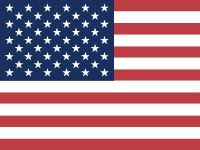

In [ ]:
graphstat("USA")

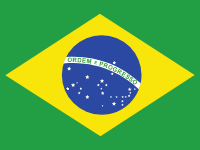

In [ ]:
graphstat("Brazil")

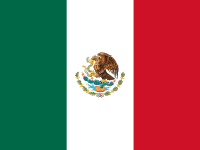

In [ ]:
graphstat("Mexico")

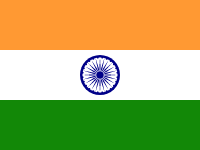

In [ ]:
graphstat("India")

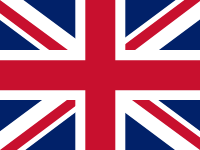

In [ ]:
graphstat("UK")

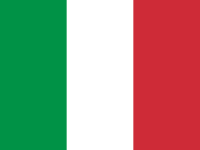

In [ ]:
graphstat("Italy")

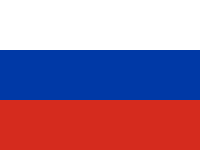

In [ ]:
graphstat("Russia")

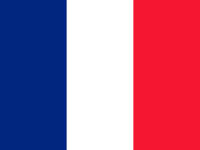

In [ ]:
graphstat("France")

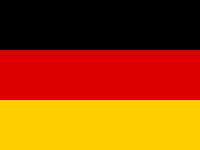

In [ ]:
graphstat("Germany")

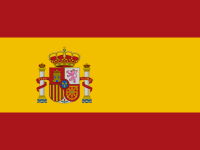

In [ ]:
graphstat("Spain")

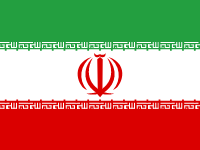

In [ ]:
graphstat("Iran")

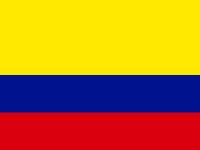

In [ ]:
graphstat("Colombia")

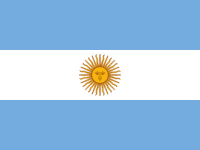

In [ ]:
graphstat("Argentina")

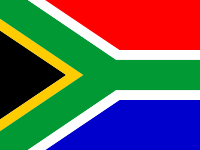

In [ ]:
graphstat("South Africa")

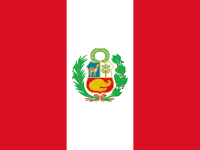

In [ ]:
graphstat("Peru")

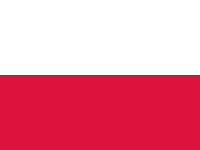

In [ ]:
graphstat("Poland")

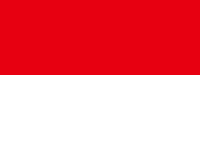

In [ ]:
graphstat("Indonesia")

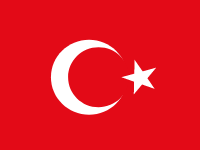

In [ ]:
graphstat("Turkey")

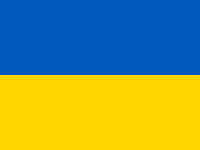

In [ ]:
graphstat("Ukraine")

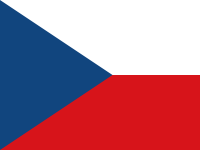

In [ ]:
graphstat("Czech Republic")

# <p style="background-color:white; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">6.20 Countries Bar Chart Race</p>

In [ ]:
#Installing Bar chart race
!pip install bar_chart_race
import bar_chart_race as bcr


In [ ]:
#Preparing data format for bar chart race

dfd["date"] = dfd["date"].apply(pd.to_datetime)
t10countries = ["USA","Brazil","Mexico","India","UK","Italy","Russia","France","Germany","Spain","Iran","Colombia","Argentina","South Africa","Peru","Poland","Indonesia","Turkey","Ukraine","Czech Republic"]


In [ ]:

t10c = dfd["country"].isin(t10countries)
top10country=dfd[t10c]
cases = top10country.pivot_table(index='date', columns='country', values='cumulative_total_cases')

cases


In [ ]:
bcr.bar_chart_race(cases,title='Coronavirus Total Cases',figsize=(3, 4),bar_label_size=5,tick_label_size=5)



In [ ]:
cases2 = top10country.pivot_table(index='date', columns='country', values='cumulative_total_deaths')

cases2

In [ ]:
bcr.bar_chart_race(cases2,title='Coronavirus Total Deaths',figsize=(3, 4),bar_label_size=5,tick_label_size=5)
